In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Intenstine
m1 = m2 + m3

m2 = .1m1

m3 = .9m1

In [10]:
#INTESTINE 
Fe_molar = 55.8473 # g/mol
m1 = 18 # mg/day
m2 = 18 * .1 #mg/day
m3 = 18 * .9 #mg/day

#CHECK: 
print(m1 - m2 - m3)

0.0


In [3]:
#FE BINDING
utf_molar = 80_000 #g/mol
btf_molar = 2*Fe_molar + utf_molar 
m3 = 3.22*(10**-5) * Fe_molar
m4 = 2.69*(10**-5) * Fe_molar 
m5 = 2.65*(10**-6) * utf_molar
m6 = 2.65*(10**-6) * btf_molar

print(m3 + m5 - m4 - m6)

0.0


### Liver

$IN - OUT + GEN - CONS = 0$

$GEN = OUT - IN$

$\sigma R = OUT - IN$

$\dot m_{12} - \dot m_5 - \dot m_7 = 0$

In [12]:
m7 = 3.57*(10**-4)
m12 = 3.6*(10**-4)
print(m12 - m7 - m5)
gen_liver = m12 - m7 - m5

-0.21199699999999996


### bTf Box
$ IN - OUT = 0 $

$ \dot m_6 + \dot m_7 = \dot m_8 $

In [30]:
n8 = 7.2*(10**-4) # KNOWN
m8 = n8 * btf_molar
m6 = 2.65*(10**-6) * btf_molar

m7 = m8 - m6
print(f'n7 flow rate:  {m7/btf_molar:.6f}')
assert m6 + m7 - m8 == 0

n7 flow rate:  0.000717


### Bone Marrow
$ IN - OUT + GEN - CONS = 0 $

$ n_8 - n_9 + GEN = 0$

$ \sigma R = GEN = n_9 - n_8 $

In [45]:
# Bone Marrow
print(n8)
n9 = .5 * n8
print(n9)
print(n9 - n8)

0.00072
0.00036
-0.00036


### Heme box

$ 1.08 x 10^9 {heme ~molecules} = 1 {RBC molecules} $

$ n_9 * 6.022 * 10^{23} $

In [123]:
#HEME
heme_molar = 616.487 # g/mol
n10 = 200000000000 / (6.022*(10**23)) # 200 billion RBC, TURNING POINT OF MODEL
n9 = (4) * (270_000_000) * (n10)

gen_heme = n9 - n10
print(gen_heme) #rxn is insignificant
rbc_mass = 27*10**(-12) * 6.022 * 10**(23) #pic
print(f'n9: {n9}', f'n10: {n10}')
m10 = n10*rbc_mass
print(f'mass of 10 stream: {m10}')

0.0003586848219860512
n9: 0.00035868482231816675 n10: 3.3211557622052476e-13
mass of 10 stream: 5.4


### RBC 
$ IN - OUT + GEN = 0 $

$ GEN = m12 - m10 $


In [72]:
gen_degradation = m12 - m10
assert m12 < m10
print(gen_degradation)

# print(f'{m12 / Fe_molar}')

-5.399640000000001


### Enzymatic back-tracking for the synthesis of Heme

In [2]:
# Enzymatic back tracking:
# We use n9 to back track into enzyme concentration since we know the concentration of substrates and Km and Kcat
# v = [E0]*[Fe]*[PPIX]*kcat / (KmFe*[Fe] + KmPPIX*[PPIX] + [Fe]*[PPIX])
# therefore [E0] = v*(KmFe*[Fe] + KmPPIX*[PPIX] + [Fe]*[PPIX]) / ([Fe]*[PPIX]*kcat)
# v = n9 = 0.109uM/min
# [PPIX] = 15 uM
# [Fe] = 17 uM
# KmFe = 9.0 uM
# KmPPIX = 9.3 uM
# kcat = 10.2 1/min
E0 = (0.109*((9.0)*17 + 9.3*15 + 17*15)) / (17*15*10.2)
# units = uM
print(E0)

0.02294405997693195


### Diseased-State Synthesis of Heme

In [6]:
# Assume [E0], [PPIX], kcat, and KM values do not change
# [Fe] changes to 60 uG/dL
Fe_Dis = 60 * 10 * (1/55.845)
# ^ conversion from uG/dL to uM
# v = [E0]*[Fe]*[PPIX]*kcat / (KmFe*[Fe] + KmPPIX*[PPIX] + [Fe]*[PPIX])
v_dis = (0.02294405997693195) * Fe_Dis * 15 * 10.2 / (9.0*Fe_Dis + 9.3*15 + Fe_Dis*15)
# ^ units = uM/min
print(Fe_Dis, v_dis)
# plasma volume in a woman = 2.3L
n9_dis = v_dis * 2.3 * 60 * 24 * 10**-6
# ^ units = mols/day
print(n9_dis)

10.744023636852 0.09491793034536491
0.0003143681853038486


### Fed Batch Synthesis System

## SS
## in - cons = 0

(0.0, 0.7245)

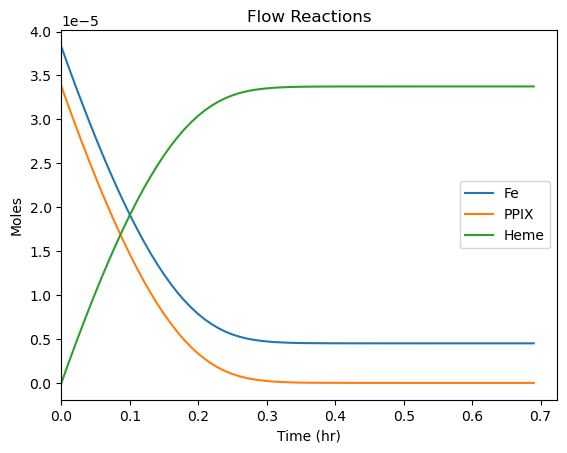

In [101]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

tspan = np.arange(0.0, 0.7, 0.01) #days
# time span for integration

Vmax = (0.23 *(10**-6))*1440 #M/min

#Initial flow rates 
Fe0 = (17 *(10**-6)) * 2.25 #mol
PPIX0 = 15*(10**-6) * 2.25 #M
kmP = 9.3 *(10**-6)#M
kmFe = 9.0 *(10**-6)#M
CO = 5*1440 #L/min
#assume density of bone marrow ~ of blood (1g/cm^3)
dens = 1

#Molar flow rates in of both substrates 
iron_inlet = n8 * 2 #2 irons per 1 btf
ppix_inlet = 10**-4

X0 = np.array([Fe0, PPIX0, 0])  # Initial moles of A and B in vessel

def FlowReact(X, t): 
    Fe = X[0]  # Moles of Fe
    PPIX = X[1]  # Moles of PPIX
    
    vol = (X[0] + X[1]) / dens   
    Fe_conc = X[0]/vol
    PPIX_conc = X[1]/vol 
    
    cons = (-(Vmax * Fe_conc * PPIX_conc) / ((kmP * Fe_conc) + (kmFe * PPIX_conc) + (Fe * PPIX_conc)))
    
    dFe = (iron_inlet + cons)*vol  # Change in Fe is flow in - consumption
    dPPIX = (ppix_inlet + cons)*vol      # Change in PPIX is flow in - consumption
    dHeme = -cons*vol  # Change in Heme is generation 
    
    return np.array([dFe, dPPIX, dHeme])

solution = integrate.odeint(FlowReact, X0, tspan)  # Solve ode

fig, ax1 = plt.subplots()      # Create plot for use with two y-axes
ax1.plot(tspan, solution[:,0], label='Fe')      # Plot of Fe vs. time on axis 1 (left)
ax1.plot(tspan, solution[:,1], label='PPIX')      # Plot of PPIX vs. time on axis 1 (left)
ax1.plot(tspan, solution[:,2], label='Heme')      # Plot of Heme vs. time on axis 1 (left)
plt.title("Flow Reactions")    # Set plot title
plt.xlabel("Time (hr)")        # Set x-axis title
plt.ylabel("Moles")            # Set y-axis title (left)
plt.legend()                   # Set legend for left axis
plt.xlim(left=0)               # Set lower x-axis value to 0

## gen - out = 0

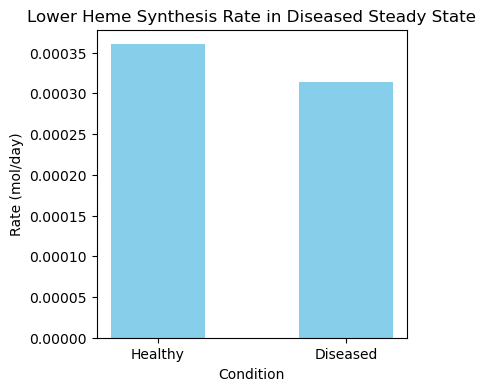

In [130]:
import matplotlib.pyplot as plt

# Define the data
healthy_rate = 3.6e-4
diseased_rate = 3.14e-4

# Create a bar chart
plt.figure(figsize=(4, 4))
plt.bar([0, 0.2], [healthy_rate, diseased_rate], width=0.1, align='center', color="skyblue")
plt.xticks([0, 0.2], ['Healthy', 'Diseased'])

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Rate (mol/day)')
plt.title('Lower Heme Synthesis Rate in Diseased Steady State')

# Display the chart
plt.show()


### Hematocrit 
$ HCT = (RBC x MCV)/10 $

In [144]:
healthy_MCV = 90*(10**-15) #Liters
dis_MCV = 50*(10**-15) #Liters #Value is assumed, anemic is classified as <80 fl 

#Flow rate representing RBC synthesis = n10
n10_dis = 2.91*(10**-13)

#Fractional difference between healthy vs diseased RBC production 
frac_diff = n10_dis/n10
print(frac_diff)

#Avg for women 
healthy_RBC = 4.5*(10**12) #cells/L 
dis_RBC = healthy_RBC*frac_diff

healthy_HCT = (healthy_MCV*healthy_RBC)/10 
dis_HCT =(dis_MCV*dis_RBC)/10 
print(f'healthy Hct: {healthy_HCT}')
print(f'diseased Hct: {dis_HCT}')


0.876201
healthy Hct: 0.0405
diseased Hct: 0.0197145225


In [136]:
healthy_RBC_vol = 4.3 * .42
healthy_RBC = healthy_RBC_vol / healthy_MCV
healthy_HCT = (healthy_MCV*healthy_RBC)/10 
print(f'healthy Hct: {healthy_HCT}')

dis_RBC = healthy_RBC*frac_diff
dis_HCT =(dis_MCV*dis_RBC)/10
print(f'diseased Hct: {dis_HCT}')

healthy Hct: 0.18059999999999998
diseased Hct: 0.087912167


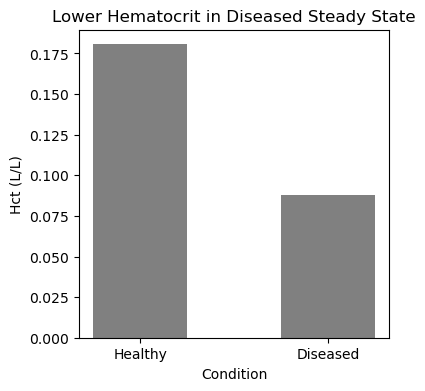

In [139]:
# Create a bar chart
plt.figure(figsize=(4, 4))
plt.bar([0, 0.2], [healthy_HCT, dis_HCT], width=0.1, align='center', color="gray")
plt.xticks([0, 0.2], ['Healthy', 'Diseased'])

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Hct (L/L)')
plt.title('Lower Hematocrit in Diseased Steady State')

# Display the chart
plt.show()